#  Term Paper. Quantitative Macroeconomics
## Title Here
#### Author: Sergi Quintana Garcia

# Complete Market Economy

### What  is the effect of a production shock when the economy is at the steady state  ? 

In [132]:
# Defina all the parameters values: 

rho = 0.06
beta = 1/(1+rho)
theta = 0.679
sigma=2
delta=0.08
l=1          # labor is inelastically supplied
kss = ((1-theta)/((1/beta)-1+delta)) ** (1/theta) # Steady State Level of Capital
y_i = kss**(1-theta)   # Steady State Output
i_i  = delta*kss       # Steady State Investment
c_i = y_i - i_i        # Steady State Level Of Consumption

# Suppose now we introduce a shock on labor, so that only (1-phi) agents work .

phi= 0.2     # Dimension of the shock. 
lnew=1-phi   # New labor supply of the economy
kss_new = lnew*((1-theta)/((1/beta)-1+delta)) ** (1/theta)  # New Steady State Level of Capital

print(kss)
print(kss_new)

3.3942723119702367
2.7154178495761894


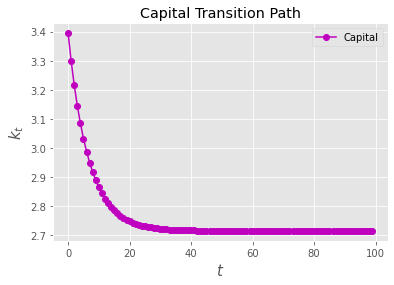

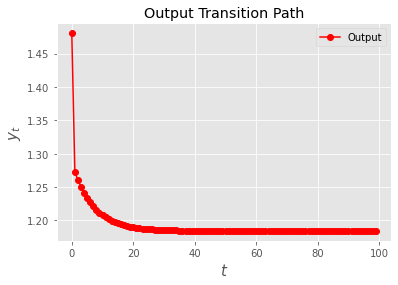

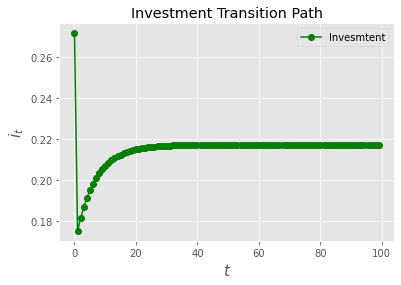

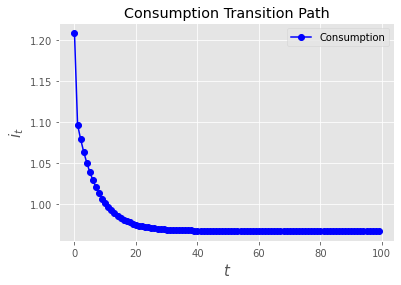

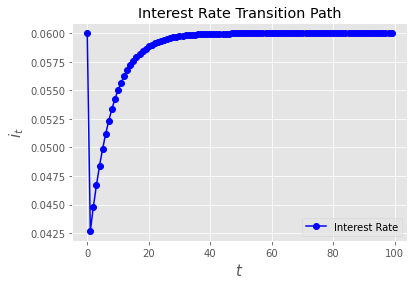

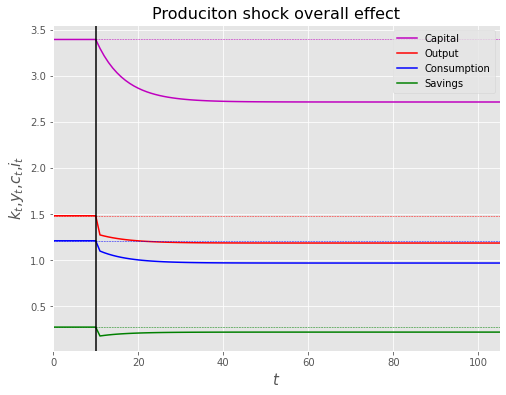

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('ggplot')


#Characterize the transition path: 

n = 100 # Number of periods of transition

k = np.zeros(n) 

def transition_path(k,n=n):
    "This function returns the transition path towards the steady state over n periods"
    k[0] = kss       # Initial Capital Level (First Steady State)
    k[n-1] = kss_new     # Final Capital Level (Second Steady State)
    
    #Now let's generate the "n" different Euler equations: 
    trans = np.zeros(n)
    for i in range(n-2):
        if i == (n-2): #Since the other function is not well defined at n-2
            trans[i+1] = k[i+1]**(1-theta)*(lnew)**theta+(1-delta)*k[i+1]-kss_new-beta*(k[i]**(1-theta)*(lnew)**theta+(1-δ)*k[i]-k[i+1])*((1-theta)*k[i+1]**(-theta)*(lnew)**theta+1-delta)
        else:
            trans[i+1] = k[i+1]**(1-theta)*(lnew)**theta+(1-delta)*k[i+1]-k[i+2]-beta*(k[i]**(1-theta)*(lnew)**theta+(1-delta)*k[i]-k[i+1])*((1-theta)*k[i+1]**(-theta)*(lnew)**theta+1-delta)
    return trans                        # trans is the system of equations that we need to solve

#Define an initial guess: 

x0 = np.linspace(kss,kss_new,n)                 # Grid of n points between4 and 8, which is the transition space. 
k_trans = fsolve(transition_path,x0)            # Solves the system of equations. Gives the transition path.


#Generate the transition path for the other variables:

## Output: 
y =np.zeros(n)
y[0]=y_i                                 # Initial Output level at First Steady State
for i in range(n -1):
    y[i+1]=k_trans[i]**(1-theta)*(lnew)**theta    # (y_{t} = k_{t}^(1-θ)(zh)^θ)

## Investment: 
i_path = np.zeros(n)
i_path[0] = i_i                                       # Initial Steady State level
for i in range (n-1):
    i_path[i+1] = k_trans[i+1] - (1-delta)*k_trans[i]     # (i_{t} = k_{t+1} - (1-δ)k_t)

## Consumption: 
c = np.zeros(n)
c[0] = c_i                             # Initial Steady State level
for i in range(n-1):
    c[i+1] = y[i+1] - i_path[i+1]      # (c_{t} = y_{t} - i_{t})

# Interest rate: 
int_rate = np.zeros(n)
int_rate[0] = (1-theta)* kss**(-theta)-delta
for i in range(n-1):
    int_rate[i+1] = (1-theta)* k_trans[i+1]**(-theta)*lnew**(theta)-delta
  




# Plots: 

fig, ax = plt.subplots()
ax.plot(k_trans,'m-o',label="Capital")
plt.ylabel("$k_t$",fontsize=15)
plt.xlabel("$t$",fontsize=15)
plt.legend()
plt.title("Capital Transition Path")
plt.savefig('Capital_1.png')


fig, ax = plt.subplots()
ax.plot(y,'r-o',label = "Output")
plt.ylabel("$y_t$",fontsize = 15)
plt.xlabel("$t$",fontsize = 15)
plt.legend()
plt.title("Output Transition Path")
plt.savefig('Output_1.png')

fig, ax = plt.subplots()
ax.plot(i_path,'g-o',label = "Invesmtent")
plt.ylabel("$i_t$",fontsize = 15)
plt.xlabel("$t$",fontsize = 15)
plt.legend()
plt.title("Investment Transition Path")
plt.savefig('Investment_1.png')

fig, ax = plt.subplots()
ax.plot(c,'b-o',label = "Consumption")
plt.ylabel("$i_t$",fontsize = 15)
plt.xlabel("$t$",fontsize = 15)
plt.legend()
plt.title("Consumption Transition Path")
plt.savefig('Consumption_1.png')

fig, ax = plt.subplots()
ax.plot(int_rate,'b-o',label = "Interest Rate")
plt.ylabel("$i_t$",fontsize = 15)
plt.xlabel("$t$",fontsize = 15)
plt.legend()
plt.title("Interest Rate Transition Path")
plt.savefig('Interest_1.png')


# More !! --> Show the overall effect on the economy:

# I will now consider that the economy was at the steady state for 10 peridos, and then introduce the shock:

i= 10       #Numer of periods at initial steady state

k_ss = np.ones(i)*kss         # Capital Steady State
c_ss = np.ones(i)*c_i      # Consumption Steady State
i_ss = np.ones(i)*i_i      # Investment Steady State
y_ss = np.ones(i)*y_i           # Output Steady State

k_extra = np.concatenate((k_ss,k_trans))
c_extra = np.concatenate((c_ss,c))
i_extra = np.concatenate((i_ss,i_path))
y_extra = np.concatenate((y_ss,y))


trend_k = np.ones(n + i)*kss 
trend_y = np.ones(n + i)*y_i 
trend_c = np.ones(n + i)*c_i 
trend_i = np.ones(n + i)*i_i 


fig = plt.figure(figsize=(8,6))
grid = np.arange(0, n+i, 1)
plt.plot(grid, k_extra, 'm', label='Capital')
plt.plot(grid, y_extra, color='r', label='Output')
plt.plot(grid, c_extra, color='b', label='Consumption')
plt.plot(grid, i_extra, color='g', label='Savings')
plt.plot(grid, trend_k, 'm--', linewidth=0.5)
plt.plot(grid, trend_y, 'r--',linewidth=0.5 )
plt.plot(grid, trend_c, 'b--',linewidth=0.5 )
plt.plot(grid, trend_i, 'g--',linewidth=0.5 )
plt.axvline(10, color='black')
plt.xlabel('$t$', fontsize =15)
plt.ylabel('$k_t$,$y_t$,$c_t$,$i_t$', fontsize=15)
plt.xlim(0, 105)
plt.legend(loc = 'upper right')
plt.title('Produciton shock overall effect', fontsize=16)
plt.savefig('Transition_1.png')


plt.show()

### What is the effect is the shock just last some periods ? 

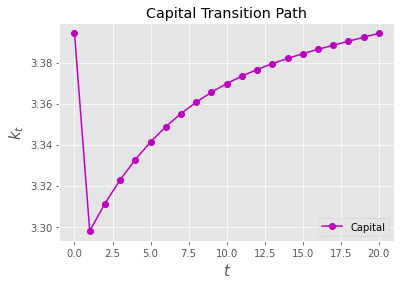

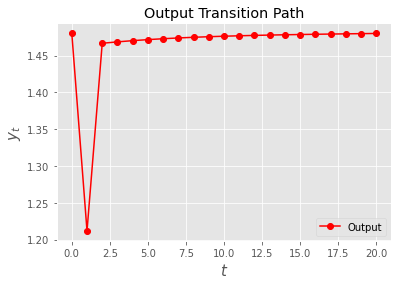

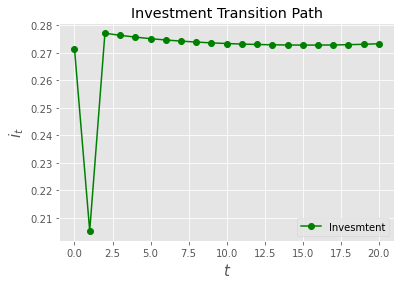

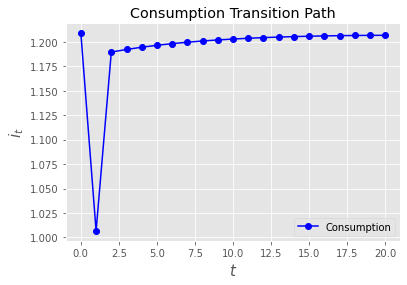

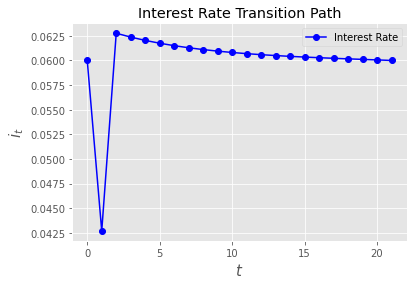

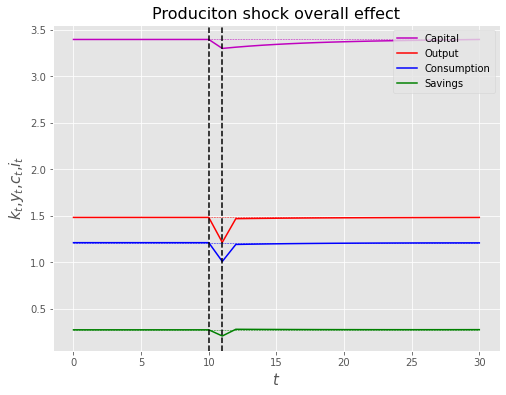

In [147]:
lnew=l
t=1

n=20

def transition_path(k,n=n):
    "This function returns the transition path towards the steady state over n periods"
    k[0] = k_trans[t]       
    k[n-1] = kss            
    
    #Now let's generate the "n" different Euler equations: 
    trans = np.zeros(n)
    for i in range(n-2):
        if i == (n-2): #Since the other function is not well defined at n-2
            trans[i+1] = k[i+1]**(1-theta)*(lnew)**theta+(1-delta)*k[i+1]-kss_new-beta*(k[i]**(1-theta)*(lnew)**theta+(1-δ)*k[i]-k[i+1])*((1-theta)*k[i+1]**(-theta)*(lnew)**theta+1-delta)
        else:
            trans[i+1] = k[i+1]**(1-theta)*(lnew)**theta+(1-delta)*k[i+1]-k[i+2]-beta*(k[i]**(1-theta)*(lnew)**theta+(1-delta)*k[i]-k[i+1])*((1-theta)*k[i+1]**(-theta)*(lnew)**theta+1-delta)
    return trans                        # trans is the system of equations that we need to solve

#Define an initial guess: 

x0 = np.linspace(kss,kss_new,n)                 # Grid of n points between4 and 8, which is the transition space. 
k_trans3 = fsolve(transition_path,x0)    # Solves the system of equations. Gives the transition path.


#Generate the transition path for the other variables:

## Output: 

y3=np.zeros(n)
y3[0]=y[9]                                # Period t=10 transition from first Steady State to second
for i in range(n -1):
    y3[i+1]=k_trans3[i]**(1-theta)*(lnew)**theta    # (y_{t} = k_{t}^(1-θ)(zh)^θ)

## Investment: 

i_path3=np.zeros(n)
i_path3[0] = i_path[9]                                       # Period t=10 transition from first Steady State to second
for i in range (n-1):
    i_path3[i+1] = k_trans3[i+1] - (1-delta)*k_trans3[i]     # (i_{t} = k_{t+1} - (1-δ)k_t)

## Consumption: 

c3=np.zeros(n)
c3[0] = c[9]                             # Period t=10 transition from first Steady State to second
for i in range(n-1):
    c3[i+1] = y3[i+1] - i_path3[i+1]      # (c_{t} = y_{t} - i_{t})
    
# Transition for interest rate: 

# Interest rate: 
int_rate3 = np.zeros(n)
#int_rate3[0] = (1-theta)* kss**(-theta)-delta
#int_rate3[1] = (1-theta)* k_trans[1]**(-theta)*((1-phi))**(theta)-delta
for i in range(n):
    int_rate3[i] = (1-theta)* k_trans3[i]**(-theta)*lnew**(theta)-delta


# Merge !! --> Merge this new transition with the 10 first periods of the transition at question 1.(c) 

k_3a = np.concatenate((k_trans[:t],k_trans3))
c_3a = np.concatenate((c[:t],c3))
i_3a = np.concatenate((i_path[:t],i_path3))
y_3a = np.concatenate((y[:t],y3))
int_rate3a = np.concatenate((int_rate[:t+1],int_rate3))    
# Plots: 

fig, ax = plt.subplots()
ax.plot(k_3a,'m-o',label="Capital")
plt.ylabel("$k_t$",fontsize=15)
plt.xlabel("$t$",fontsize=15)
plt.legend()
plt.title("Capital Transition Path")
plt.savefig('capital_2.png')


fig, ax = plt.subplots()
ax.plot(y_3a,'r-o',label = "Output")
plt.ylabel("$y_t$",fontsize = 15)
plt.xlabel("$t$",fontsize = 15)
plt.legend()
plt.title("Output Transition Path")
plt.savefig('output_2.png')

fig, ax = plt.subplots()
ax.plot(i_3a,'g-o',label = "Invesmtent")
plt.ylabel("$i_t$",fontsize = 15)
plt.xlabel("$t$",fontsize = 15)
plt.legend()
plt.title("Investment Transition Path")
plt.savefig('investment_2.png')

fig, ax = plt.subplots()
ax.plot(c_3a,'b-o',label = "Consumption")
plt.ylabel("$i_t$",fontsize = 15)
plt.xlabel("$t$",fontsize = 15)
plt.legend()
plt.title("Consumption Transition Path")
plt.savefig('consumption_2.png')

fig, ax = plt.subplots()
ax.plot(int_rate3a,'b-o',label = "Interest Rate")
plt.ylabel("$i_t$",fontsize = 15)
plt.xlabel("$t$",fontsize = 15)
plt.legend()
plt.title("Interest Rate Transition Path")
plt.savefig('Interest_2.png')

# More !! --> Show the overall effect on the economy:

# Introduce 10 periods at initial steady state: 

i=10         # Number of periods at initial steady state

k_extra3 = np.concatenate((k_ss,k_3a))
c_extra3 = np.concatenate((c_ss,c_3a))
i_extra3 = np.concatenate((i_ss,i_3a))
y_extra3 = np.concatenate((y_ss,y_3a))

trend_k3 = np.ones(n + i+t)*kss 
trend_y3 = np.ones(n + i+t)*y_i 
trend_c3 = np.ones(n + i+t)*c_i 
trend_i3 = np.ones(n + i+t)*i_i 

fig = plt.figure(figsize=(8,6))
grid = np.arange(0, n+i+t, 1)
plt.plot(grid, k_extra3, 'm', label='Capital')
plt.plot(grid, y_extra3, color='r', label='Output')
plt.plot(grid, c_extra3, color='b', label='Consumption')
plt.plot(grid, i_extra3, color='g', label='Savings')
plt.plot(grid, trend_k3, 'm--', linewidth=0.5)
plt.plot(grid, trend_y3, 'r--',linewidth=0.5 )
plt.plot(grid, trend_c3, 'b--',linewidth=0.5 )
plt.plot(grid, trend_i3, 'g--',linewidth=0.5 )
plt.axvline(10 ,ls='--',color='black')
plt.axvline(t+10,ls='--', color='black')
plt.xlabel('$t$', fontsize =15)
plt.ylabel('$k_t$,$y_t$,$c_t$,$i_t$', fontsize=15)
plt.legend(loc = 'upper right')
plt.title('Produciton shock overall effect', fontsize=16)
plt.savefig('Transition_2.png')


plt.show()
